# IS590PR Final Project
### Phoebe Hwang

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import myfunctions

### Chicago Crimes Dataset (2001 to present)

In [2]:
f_crime = pd.read_csv("~/Downloads/Crimes_2001_to_present.csv",
                     dtype = {'ID': int, 'Date': object, 'Primary Type': object, 'Location Description': object,
                              'Beat': int, 'District': float, 'Ward': float, 'Community Area': float, 'Year': int,
                             'Latitude': float, 'Longitude': float, 'Location': object})
#f_crime.dtypes

In [3]:
f_crime["Date"] = pd.to_datetime(f_crime["Date"])

In [4]:
f_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,2001-01-01 11:00:00,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,2017-10-08 03:00:00,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,2017-03-28 14:00:00,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,2017-09-09 20:17:00,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,2017-08-26 10:00:00,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


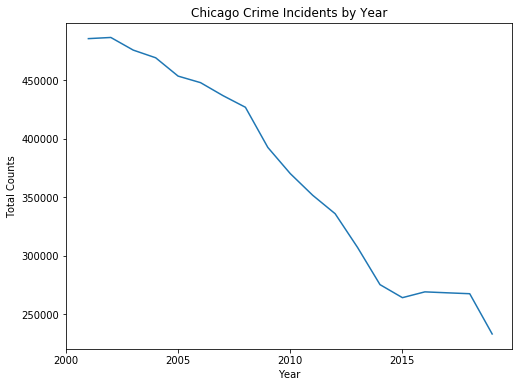

In [5]:
crime_year = f_crime["ID"].groupby(f_crime["Date"].dt.year).count()

plt.figure(figsize = [8, 6])
plt.plot(crime_year)
plt.xticks(np.arange(2000, 2020, 5))
plt.title("Chicago Crime Incidents by Year")
plt.xlabel("Year")
plt.ylabel("Total Counts")
plt.savefig("byYear.jpg")

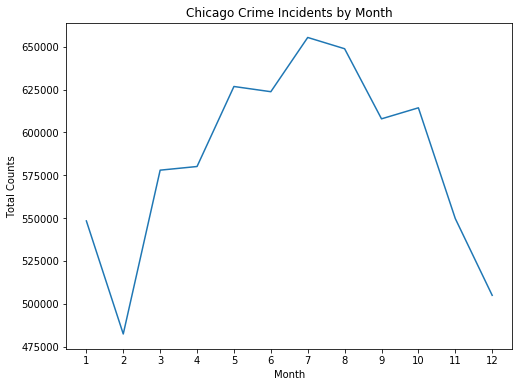

In [6]:
crime_month = f_crime["ID"].groupby(f_crime["Date"].dt.month).count()

plt.figure(figsize = [8, 6])
plt.plot(crime_month)
plt.xticks(np.arange(1, 13, 1))
plt.title("Chicago Crime Incidents by Month")
plt.xlabel("Month")
plt.ylabel("Total Counts")
plt.savefig("byMonth.jpg")

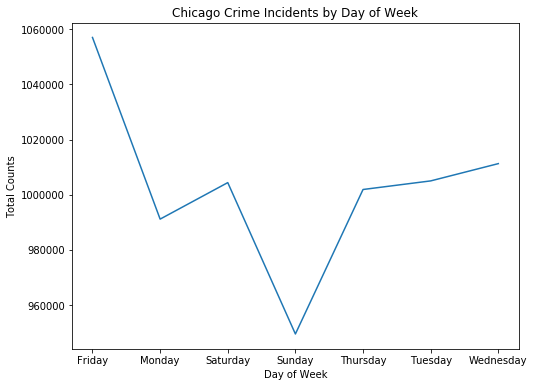

In [7]:
f_crime["Day"] = f_crime["Date"].dt.day_name()
crime_day = f_crime["ID"].groupby(f_crime["Day"]).count()

plt.figure(figsize = [8, 6])
#day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#fig, ax = plt.subplots()
plt.plot(crime_day)
plt.title("Chicago Crime Incidents by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Counts")
plt.savefig("byDayofW.jpg")
#plt.plot(range(len(day_order)), list(map(float, crime_day)))
#plt.xticks(range(len(day_order)), day_order)
#ax.set_xticklabels(day_order)
#f_crime.set_index("Day").loc(day_order).plot()

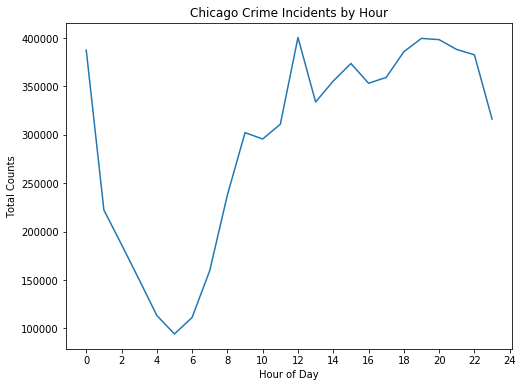

In [8]:
f_crime["Hour"] = f_crime["Date"].dt.hour
crime_hr = f_crime["ID"].groupby(f_crime["Hour"]).count()

plt.figure(figsize = [8, 6])
plt.plot(crime_hr)
plt.xticks(np.arange(0, 25, 2))
plt.title("Chicago Crime Incidents by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Counts")
plt.savefig("byHour.jpg")

## Hypothesis 1: Crime rates are higher during holidays.

In [9]:
f_crime["Holiday"] = f_crime.apply(myfunctions.fed_holiday, axis = 1)

In [10]:
tot_day = (f_crime["Date"].dt.date.max() - f_crime["Date"].dt.date.min()).days
tot_yr = f_crime["Year"].nunique()
day_cnt = tot_day - 10*tot_yr
day_cnt

6712

In [11]:
crime_holiday = f_crime.groupby(f_crime["Holiday"]).size()
crime_holiday = pd.DataFrame(crime_holiday).reset_index()
crime_holiday = crime_holiday.rename(columns = {0: 'Total'})
crime_holiday["Annual"] = crime_holiday.apply(myfunctions.daily_incidents, axis = 1)
crime_holiday = crime_holiday.reindex([6, 4, 8, 5, 2, 3, 1, 10, 9, 0, 7])
crime_holiday

,Holiday,Total,Annual
6,New Year's Day,29426,1548.736842
4,Martin Luther King Day,18108,953.052632
8,President's Day,17165,903.421053
5,Memorial Day,20995,1105.000000
2,Independence Day,20517,1079.842105
3,Labor Day,20430,1075.263158
1,Columbus Day,19851,1044.789474
10,Veterans Day,18546,976.105263
9,Thanksgiving Day,17401,966.722222
0,Christmas Day,10617,589.833333


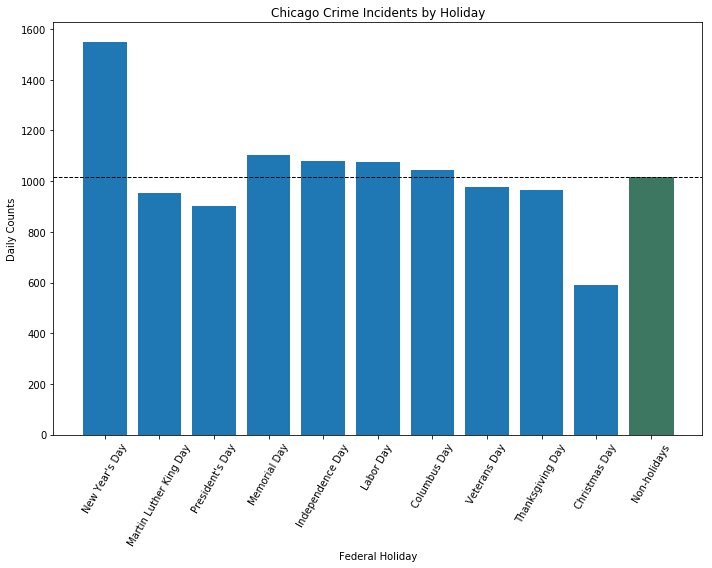

In [46]:
plt.figure(figsize = [10, 8])
crime_hol_ax = np.arange(len(crime_holiday))
bar_h = plt.bar(crime_hol_ax, crime_holiday["Annual"])
bar_h[10].set_color('#3D7761')
plt.axhline(y = crime_holiday["Annual"][7], color = 'black', linewidth = 1, linestyle = '--')
plt.xticks(crime_hol_ax, crime_holiday["Holiday"], rotation = 60)
plt.title("Chicago Crime Incidents by Holiday")
plt.xlabel("Federal Holiday")
plt.ylabel("Daily Counts")
plt.tight_layout()
plt.savefig("byHoliday.jpg")

## Hypothesis 3: Certain crime types highly occurred on certain locations.

In [13]:
crime_types = f_crime["ID"].groupby(f_crime["Primary Type"]).count().sort_values(ascending = False)
crime_types_25 = crime_types.head(20).reset_index()
crime_types_25 = crime_types_25.rename(columns = {"ID": "Type Cnt"})
crime_types_25

,Primary Type,Type Cnt
0,THEFT,1483192
1,BATTERY,1283378
2,CRIMINAL DAMAGE,799303
3,NARCOTICS,725984
4,ASSAULT,439883
5,OTHER OFFENSE,436164
6,BURGLARY,398212
7,MOTOR VEHICLE THEFT,323692
8,DECEPTIVE PRACTICE,283331
9,ROBBERY,264078


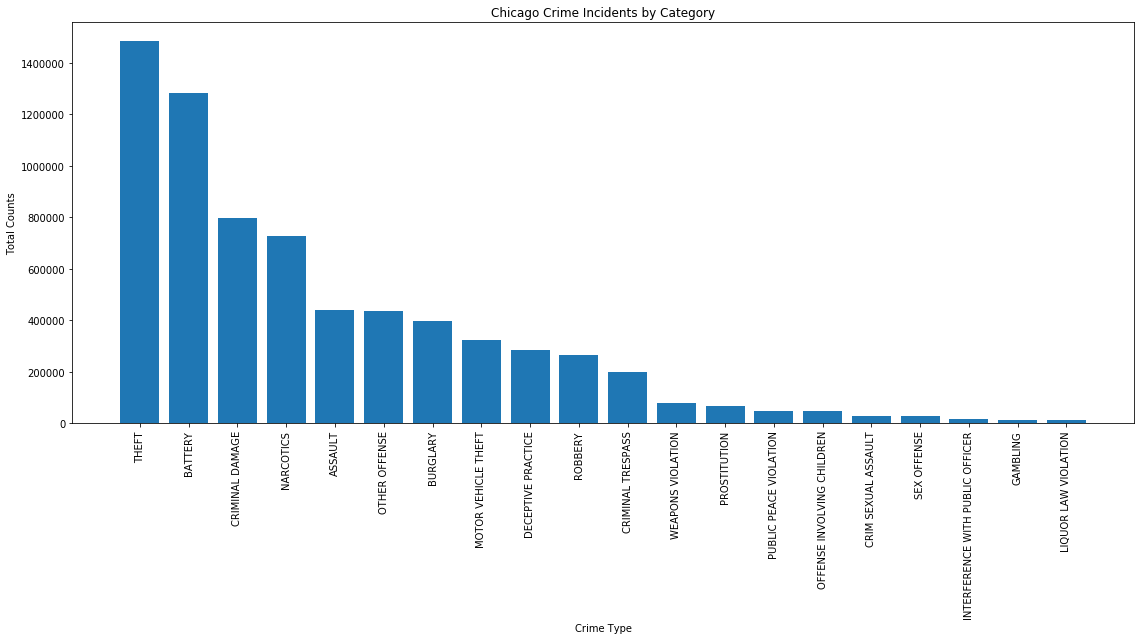

In [14]:
plt.figure(figsize = [16, 9])
crime_types_ax = np.arange(len(crime_types_25))
plt.bar(crime_types_ax, crime_types_25["Type Cnt"])
plt.xticks(crime_types_ax, crime_types_25["Primary Type"], rotation = 90)
plt.title("Chicago Crime Incidents by Category")
plt.xlabel("Crime Type")
plt.ylabel("Total Counts")
plt.tight_layout()
plt.savefig("byType.jpg")

In [15]:
crime_loc = f_crime["ID"].groupby(f_crime["Location Description"]).count().sort_values(ascending = False)
crime_loc_25 = crime_loc.head(20).reset_index().rename(columns = {"ID": "Loc Cnt"})
crime_loc_25

,Location Description,Loc Cnt
0,STREET,1829769
1,RESIDENCE,1188392
2,APARTMENT,733804
3,SIDEWALK,686423
4,OTHER,267827
5,PARKING LOT/GARAGE(NON.RESID.),201576
6,ALLEY,156121
7,"SCHOOL, PUBLIC, BUILDING",145528
8,RESIDENCE-GARAGE,135042
9,SMALL RETAIL STORE,126494


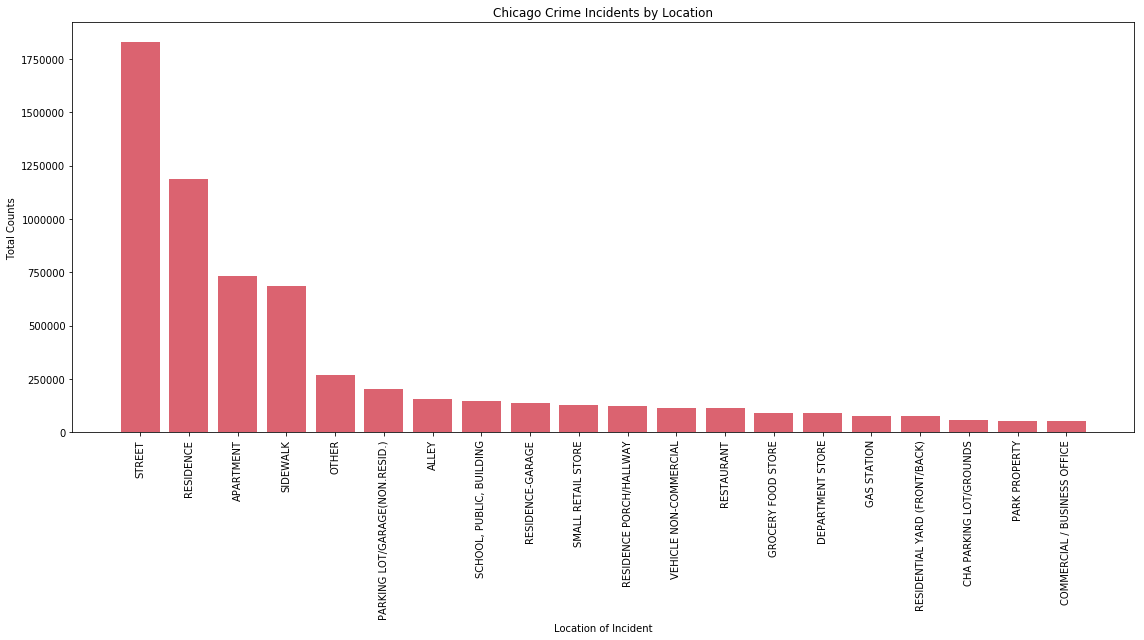

In [16]:
plt.figure(figsize = [16, 9])
crime_loc_ax = np.arange(len(crime_loc_25))
plt.bar(crime_loc_ax, crime_loc_25["Loc Cnt"], color = '#DB6370')
plt.xticks(crime_loc_ax, crime_loc_25["Location Description"], rotation = 90)
plt.title("Chicago Crime Incidents by Location")
plt.xlabel("Location of Incident")
plt.ylabel("Total Counts")
plt.tight_layout()
plt.savefig("byLocation.jpg")

In [17]:
f_crime_flt = f_crime[f_crime["Primary Type"].isin(crime_types_25["Primary Type"]) & f_crime["Location Description"].isin(crime_loc_25["Location Description"])]
f_crime_flt

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Hour,Holiday
0,11034701,JA366925,2001-01-01 11:00:00,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN,Monday,11,New Year's Day
1,11227287,JB147188,2017-10-08 03:00:00,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,Sunday,3,Non-holidays
2,11227583,JB147595,2017-03-28 14:00:00,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,Tuesday,14,Non-holidays
3,11227293,JB147230,2017-09-09 20:17:00,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,Saturday,20,Non-holidays
5,11227517,JB138481,2013-02-10 00:00:00,071XX S LAFAYETTE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,NaN,NaN,2013,02/11/2018 03:57:41 PM,NaN,NaN,NaN,Sunday,0,Non-holidays
6,11227503,JB146383,2015-01-01 00:01:00,061XX S KILBOURN AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,...,NaN,NaN,2015,04/12/2019 04:00:15 PM,NaN,NaN,NaN,Thursday,0,New Year's Day
7,11227508,JB146365,2017-01-01 00:01:00,027XX S WHIPPLE ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,...,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,Sunday,0,New Year's Day
8,11022695,JA353568,2017-07-17 10:10:00,021XX W MC LEAN AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,NaN,NaN,2017,07/24/2017 03:54:23 PM,NaN,NaN,NaN,Monday,10,Non-holidays
10,11227586,JB147613,2017-02-10 12:00:00,089XX S COTTAGE GROVE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,Friday,12,Non-holidays
11,11227475,JB147314,2017-11-22 02:42:00,056XX N CHRISTIANA AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,True,...,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,Wednesday,2,Non-holidays


In [18]:
type_loc = f_crime_flt.groupby(["Primary Type", "Location Description"]).size().unstack().fillna(0)
type_loc

Location Description,ALLEY,APARTMENT,CHA PARKING LOT/GROUNDS,COMMERCIAL / BUSINESS OFFICE,DEPARTMENT STORE,GAS STATION,GROCERY FOOD STORE,OTHER,PARK PROPERTY,PARKING LOT/GARAGE(NON.RESID.),RESIDENCE,RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,"SCHOOL, PUBLIC, BUILDING",SIDEWALK,SMALL RETAIL STORE,STREET,VEHICLE NON-COMMERCIAL
Primary Type,,,,,,,,,,,,,,,,,,,,
ASSAULT,10017.0,54906.0,3298.0,2513.0,1644.0,5541.0,4287.0,15465.0,3201.0,7870.0,76153.0,17731.0,672.0,5379.0,8597.0,25407.0,58311.0,6157.0,90098.0,1665.0
BATTERY,28229.0,255731.0,9511.0,2053.0,1824.0,8338.0,5164.0,27894.0,13002.0,17382.0,268572.0,31352.0,1740.0,9073.0,12020.0,51142.0,188602.0,5849.0,225320.0,12843.0
BURGLARY,447.0,114594.0,135.0,5259.0,743.0,410.0,2932.0,14415.0,617.0,1144.0,136037.0,1714.0,69492.0,320.0,7749.0,2234.0,172.0,8883.0,1080.0,173.0
CRIM SEXUAL ASSAULT,1941.0,7312.0,30.0,45.0,10.0,49.0,13.0,1330.0,432.0,275.0,9385.0,486.0,273.0,211.0,62.0,268.0,686.0,38.0,1366.0,1296.0
CRIMINAL DAMAGE,13888.0,83180.0,2563.0,6773.0,1084.0,5203.0,3004.0,29599.0,4396.0,34622.0,151357.0,11051.0,36325.0,11787.0,10097.0,8785.0,10210.0,8611.0,287674.0,17863.0
CRIMINAL TRESPASS,885.0,15053.0,13724.0,1375.0,1425.0,12451.0,5777.0,12622.0,1442.0,7962.0,25055.0,12986.0,2500.0,4475.0,8893.0,4454.0,3017.0,4282.0,9624.0,1303.0
DECEPTIVE PRACTICE,1152.0,20389.0,156.0,5863.0,6804.0,5525.0,4872.0,27957.0,505.0,3628.0,79119.0,609.0,172.0,254.0,10698.0,843.0,5775.0,9145.0,19960.0,638.0
GAMBLING,792.0,55.0,338.0,9.0,0.0,37.0,24.0,431.0,437.0,119.0,108.0,536.0,24.0,199.0,333.0,97.0,8259.0,41.0,1759.0,2.0
INTERFERENCE WITH PUBLIC OFFICER,771.0,326.0,107.0,8.0,6.0,174.0,23.0,196.0,233.0,481.0,473.0,227.0,12.0,156.0,58.0,64.0,3567.0,44.0,8036.0,366.0


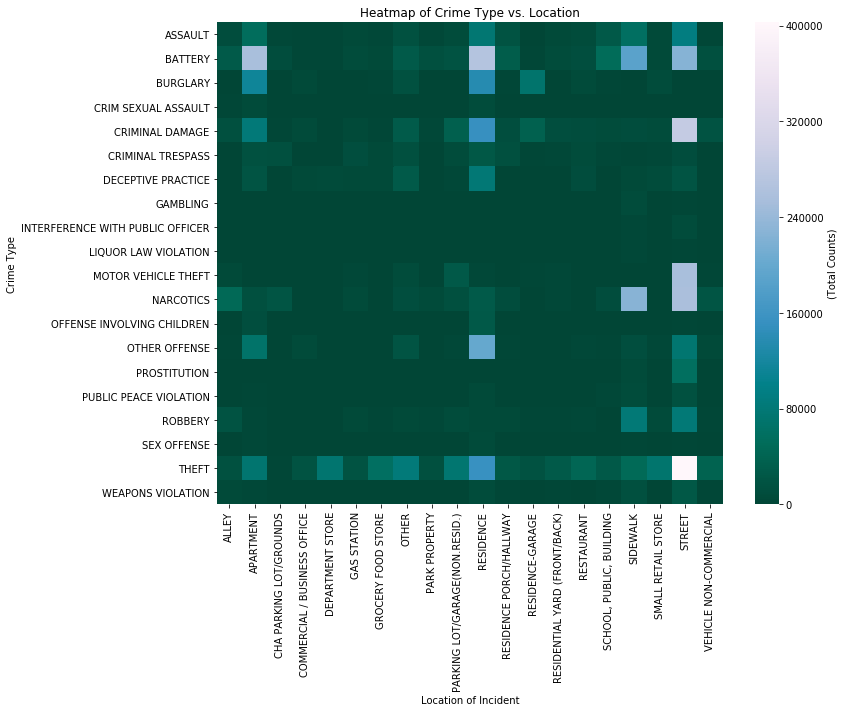

In [19]:
plt.figure(figsize = [12, 10])
sns.heatmap(type_loc, cmap = 'PuBuGn_r', cbar_kws = {'label': '(Total Counts)'})
plt.title("Heatmap of Crime Type vs. Location")
plt.xlabel("Location of Incident")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.savefig("heatTypeLoc.jpg")

In [20]:
type_hr = f_crime[f_crime["Primary Type"].isin(crime_types_25["Primary Type"])].groupby(["Primary Type", "Hour"]).size().unstack().fillna(0)
type_hr

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Primary Type,,,,,,,,,,,,,,,,,,,,,
ASSAULT,14179,11395,9385,6864,5077,4097,4895,8334,15377,18932,...,27721,29291,26733,25969,25964,25360,24816,23043,20420,17421
BATTERY,63779,61279,54730,44361,31149,21231,18018,22663,34270,40125,...,64741,70206,63921,63354,66426,68660,70613,73012,73575,69222
BURGLARY,17630,9136,8488,8019,7682,9065,13050,21204,26578,23790,...,19154,19457,18551,19624,19572,16696,15318,14832,15586,11834
CRIM SEXUAL ASSAULT,3979,1698,1795,1675,1385,986,720,634,702,731,...,813,1032,993,964,1022,1072,1279,1323,1683,1698
CRIMINAL DAMAGE,58230,34171,29254,24308,18944,15212,15652,20622,26117,26914,...,28742,33398,35550,41004,45839,45399,48182,50657,54615,43382
CRIMINAL TRESPASS,6913,5264,4312,3406,2739,2392,2688,4530,6742,7964,...,10953,10625,10276,10435,11785,13493,13142,12433,10460,8358
DECEPTIVE PRACTICE,31448,3912,3509,3031,2305,1794,2336,4175,12504,31180,...,15913,16525,14781,13881,11654,10257,8422,6023,4985,4354
GAMBLING,336,169,92,52,28,14,33,49,90,134,...,999,814,762,857,1404,1863,1550,1118,872,568
INTERFERENCE WITH PUBLIC OFFICER,970,817,645,394,276,100,92,129,220,356,...,598,756,779,928,1025,1286,1215,1168,1230,1076


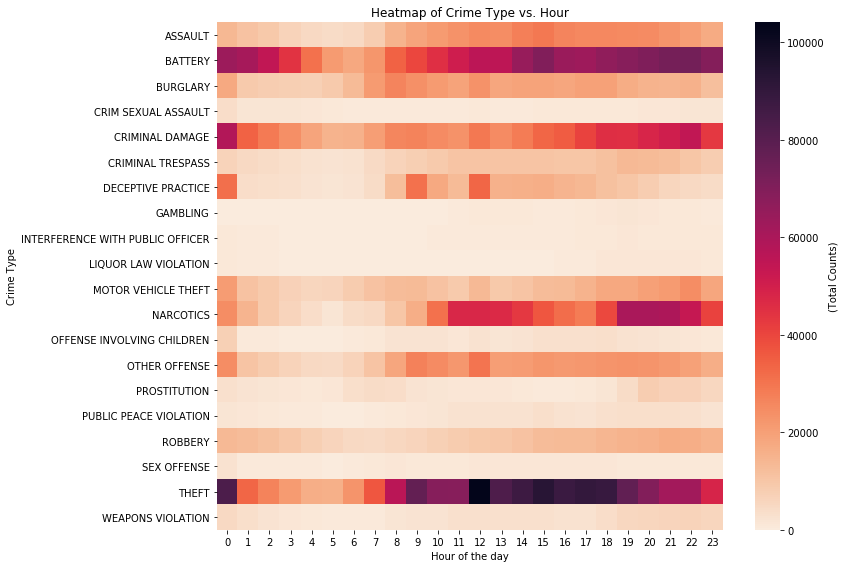

In [21]:
plt.figure(figsize = [12, 8])
sns.heatmap(type_hr, cmap = 'rocket_r', cbar_kws = {'label': '(Total Counts)'})
plt.title("Heatmap of Crime Type vs. Hour")
plt.xlabel("Hour of the day")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.savefig("heatTypeHr.jpg")

### GHCN Daily Observation Stations Dataset

In [23]:
f_station = pd.read_csv("~/Downloads/ghcnd-stations.txt", header = None, delim_whitespace = True, error_bad_lines = False)
#f_station

b'Skipping line 3: expected 8 fields, saw 9\nSkipping line 11: expected 8 fields, saw 9\nSkipping line 91: expected 8 fields, saw 10\nSkipping line 221: expected 8 fields, saw 9\nSkipping line 222: expected 8 fields, saw 10\nSkipping line 223: expected 8 fields, saw 9\nSkipping line 245: expected 8 fields, saw 11\nSkipping line 262: expected 8 fields, saw 9\nSkipping line 267: expected 8 fields, saw 9\nSkipping line 274: expected 8 fields, saw 9\nSkipping line 275: expected 8 fields, saw 10\nSkipping line 280: expected 8 fields, saw 9\nSkipping line 285: expected 8 fields, saw 9\nSkipping line 287: expected 8 fields, saw 9\nSkipping line 290: expected 8 fields, saw 9\nSkipping line 296: expected 8 fields, saw 9\nSkipping line 297: expected 8 fields, saw 10\nSkipping line 309: expected 8 fields, saw 10\nSkipping line 332: expected 8 fields, saw 9\nSkipping line 334: expected 8 fields, saw 9\nSkipping line 350: expected 8 fields, saw 10\nSkipping line 351: expected 8 fields, saw 9\nSkipp

In [24]:
# Extract stations located in Chicago
chi_station = f_station[5].str.startswith('CHICAGO')
f_station = f_station.loc[chi_station == True]
f_station

,0,1,2,3,4,5,6,7
58412,US1ILCK0010,41.8798,-87.6823,181.1,IL,CHICAGO,3.0,N
58414,US1ILCK0014,41.8008,-87.5903,182.9,IL,CHICAGO,5.5,ESE
58417,US1ILCK0032,41.9266,-87.6562,185.9,IL,CHICAGO,6.4,NNE
58418,US1ILCK0036,41.8860,-87.6210,191.1,IL,CHICAGO,4.7,NE
58422,US1ILCK0055,41.9170,-87.6386,189.9,IL,CHICAGO,6.0,NNE
58435,US1ILCK0097,41.9301,-87.6393,180.1,IL,CHICAGO,6.8,NNE
58440,US1ILCK0117,41.9125,-87.6695,178.0,IL,CHICAGO,3.0,NW
58442,US1ILCK0122,41.9272,-87.6517,187.1,IL,CHICAGO,6.5,NNE
58452,US1ILCK0179,41.9481,-87.6588,182.9,IL,CHICAGO,4.8,NNW
58460,US1ILCK0240,41.9018,-87.6726,182.9,IL,CHICAGO,2.7,WNW


### GHCN Daily Climate Data (2010)

In [25]:
f_wt = pd.read_csv("~/Downloads/ncdc_noaa_2010.csv", header = None)
f_wt = f_wt.loc[f_wt[0].isin(f_station[0])]
f_wt

,0,1,2,3,4,5,6,7
24050,USC00111497,20100101,TMAX,6,NaN,NaN,0,800.0
24051,USC00111497,20100101,TMIN,-144,NaN,NaN,0,800.0
24052,USC00111497,20100101,TOBS,-133,NaN,NaN,0,800.0
24053,USC00111497,20100101,PRCP,0,NaN,NaN,0,800.0
24054,USC00111497,20100101,SNOW,0,NaN,NaN,0,NaN
24055,USC00111497,20100101,SNWD,51,NaN,NaN,0,NaN
24056,USC00111497,20100101,SN32,0,NaN,NaN,0,800.0
24057,USC00111497,20100101,SN52,17,NaN,NaN,0,800.0
24058,USC00111497,20100101,SX32,11,NaN,NaN,0,800.0
24059,USC00111497,20100101,SX52,28,NaN,NaN,0,800.0


In [26]:
f_wt[2].unique()

array(['TMAX', 'TMIN', 'TOBS', 'PRCP', 'SNOW', 'SNWD', 'SN32', 'SN52',
       'SX32', 'SX52', 'AWND', 'PGTM', 'WDF2', 'WDF5', 'WSF2', 'WSF5',
       'WT08', 'DAPR', 'MDPR', 'WT01', 'WT02', 'WT06', 'WT03', 'WESF',
       'MNPN', 'MXPN', 'EVAP', 'WDMV', 'WT11'], dtype=object)

In [27]:
f_wt_prcp = f_wt.loc[f_wt[2] == "PRCP"].fillna(0)
f_wt_prcp = f_wt_prcp.groupby([1])[3].mean().reset_index()
f_wt_prcp = f_wt_prcp.rename(columns = {1: 'Date', 3: 'Precipitation'})
f_wt_prcp["Date"] = pd.to_datetime(f_wt_prcp["Date"], format = '%Y%m%d')

f_wt_sn = f_wt.loc[f_wt[2] == "SNOW"].fillna(0)
f_wt_sn = f_wt_sn.groupby([1])[3].mean().reset_index()
f_wt_sn = f_wt_sn.rename(columns = {3: 'Snow'})

f_wt_tmax = f_wt.loc[f_wt[2] == "TMAX"].fillna(0)
f_wt_tmax = f_wt_tmax.groupby([1])[3].mean().reset_index()
f_wt_tmax = f_wt_tmax.rename(columns = {3: 'T_Max'})
f_wt_tmin = f_wt.loc[f_wt[2] == "TMIN"].fillna(0)
f_wt_tmin = f_wt_tmin.groupby([1])[3].mean().reset_index()
f_wt_tmin = f_wt_tmin.rename(columns = {3: 'T_Min'})
f_wt_temp = pd.concat([f_wt_tmax, f_wt_tmin], axis = 1)
f_wt_temp["T"] = f_wt_temp.apply(myfunctions.daily_temp, axis = 1)
f_wt_temp

,1,T_Max,1,T_Min,T
0,20100101,-66.833333,20100101,-148.166667,-10.750000
1,20100102,-107.666667,20100102,-176.000000,-14.183333
2,20100103,-78.833333,20100103,-178.833333,-12.883333
3,20100104,-69.666667,20100104,-143.000000,-10.633333
4,20100105,-56.000000,20100105,-110.333333,-8.316667
5,20100106,-49.333333,20100106,-129.666667,-8.950000
6,20100107,-41.833333,20100107,-87.166667,-6.450000
7,20100108,-18.833333,20100108,-104.000000,-6.141667
8,20100109,-55.833333,20100109,-145.500000,-10.066667
9,20100110,-65.833333,20100110,-181.000000,-12.341667


In [28]:
f_crime_2010 = f_crime.loc[f_crime["Date"].dt.year == 2010]
f_crime_2010

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Hour,Holiday
31,11042930,JA374409,2010-01-01 00:01:00,080XX S MARSHFIELD AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,NaN,NaN,2010,08/05/2017 03:50:08 PM,NaN,NaN,NaN,Friday,0,New Year's Day
186,11033011,JA365922,2010-01-01 12:00:00,053XX S HARPER AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,NaN,NaN,2010,07/28/2017 03:47:55 PM,NaN,NaN,NaN,Friday,12,New Year's Day
415,11039140,JA371686,2010-01-01 00:00:00,055XX W FARRAGUT AVE,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,...,NaN,NaN,2010,08/02/2017 03:54:51 PM,NaN,NaN,NaN,Friday,0,New Year's Day
451,11234161,JB156598,2010-01-11 18:20:00,057XX S BISHOP ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,2010,02/19/2018 03:55:38 PM,NaN,NaN,NaN,Monday,18,Non-holidays
559,11238704,JB162786,2010-05-01 00:00:00,033XX W 63RD PL,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,False,...,NaN,NaN,2010,01/23/2019 11:23:07 AM,NaN,NaN,NaN,Saturday,0,Non-holidays
565,11239233,JB163510,2010-01-01 00:01:00,071XX S LANGLEY AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,OTHER,False,False,...,NaN,NaN,2010,02/24/2018 03:54:24 PM,NaN,NaN,NaN,Friday,0,New Year's Day
622,11241604,JB166043,2010-07-01 08:00:00,042XX S VINCENNES AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,2010,02/27/2018 03:59:52 PM,NaN,NaN,NaN,Thursday,8,Non-holidays
828,7818024,HS628367,2010-09-28 00:01:00,054XX N SHERIDAN RD,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,True,False,...,NaN,NaN,2010,09/13/2016 03:53:25 PM,NaN,NaN,NaN,Tuesday,0,Non-holidays
847,10603867,HZ355940,2010-01-26 09:00:00,031XX S LOWE AVE,1195,DECEPTIVE PRACTICE,FINAN EXPLOIT-ELDERLY/DISABLED,RESIDENCE,False,False,...,NaN,NaN,2010,07/20/2016 03:52:04 PM,NaN,NaN,NaN,Tuesday,9,Non-holidays
855,11152631,JA516212,2010-09-18 12:00:00,048XX N CHRISTIANA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,True,...,NaN,NaN,2010,03/08/2018 03:53:20 PM,NaN,NaN,NaN,Saturday,12,Non-holidays


In [29]:
f_crime_2010_byDay = f_crime_2010.groupby(f_crime_2010["Date"].dt.date).size().reset_index()
f_crime_2010_byDay = f_crime_2010_byDay.rename(columns = {0: 'Count'})
f_crime_2010_byDay

,Date,Count
0,2010-01-01,1435
1,2010-01-02,793
2,2010-01-03,760
3,2010-01-04,855
4,2010-01-05,912
5,2010-01-06,887
6,2010-01-07,864
7,2010-01-08,931
8,2010-01-09,821
9,2010-01-10,782


In [30]:
crime_prcp = pd.concat([f_wt_prcp, f_wt_sn["Snow"], f_wt_temp["T"], f_crime_2010_byDay["Count"]], axis = 1)
crime_prcp

,Date,Precipitation,Snow,T,Count
0,2010-01-01,0.000000,0.000000,-10.750000,1435
1,2010-01-02,0.000000,0.000000,-14.183333,793
2,2010-01-03,0.000000,0.000000,-12.883333,760
3,2010-01-04,0.000000,0.000000,-10.633333,855
4,2010-01-05,0.000000,0.000000,-8.316667,912
5,2010-01-06,0.000000,0.000000,-8.950000,887
6,2010-01-07,16.500000,35.500000,-6.450000,864
7,2010-01-08,50.428571,182.666667,-6.141667,931
8,2010-01-09,0.000000,0.000000,-10.066667,821
9,2010-01-10,0.000000,0.000000,-12.341667,782


## Hypothesis 2: Higher the temperature is, higher the crime rates are.

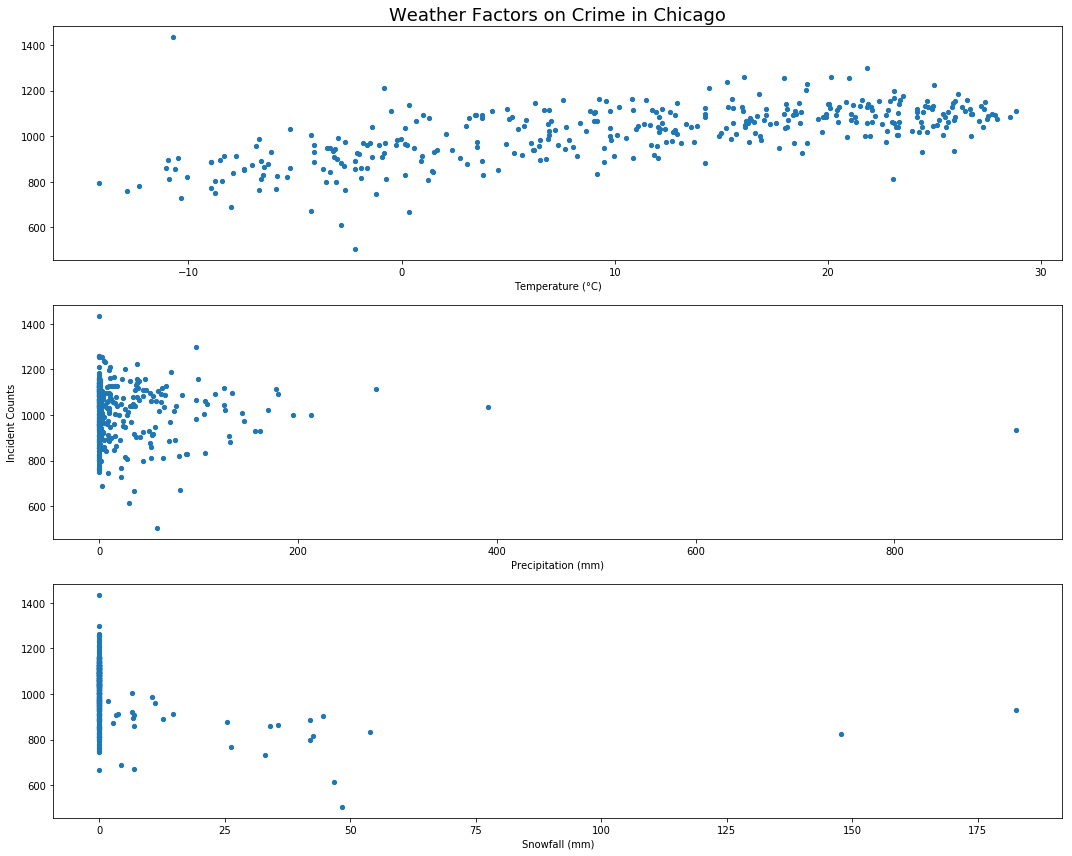

In [31]:
plt.figure(figsize = [15, 12])

plt.subplot(3, 1, 1)
plt.scatter(crime_prcp["T"], crime_prcp["Count"], s = 18)
plt.title("Weather Factors on Crime in Chicago", fontsize = 18)
plt.xlabel("Temperature (°C)")

plt.subplot(3, 1, 2)
plt.scatter(crime_prcp["Precipitation"], crime_prcp["Count"], s = 18)
plt.xlabel("Precipitation (mm)")
plt.ylabel("Incident Counts")

plt.subplot(3, 1, 3)
plt.scatter(crime_prcp["Snow"], crime_prcp["Count"], s = 18)
plt.xlabel("Snowfall (mm)")

plt.tight_layout()
plt.savefig("byWeather.jpg")